In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [52]:
df= pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [54]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

C:\Users\YASH\AppData\Local\Temp\ipykernel_19724\3435349914.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='Set2')


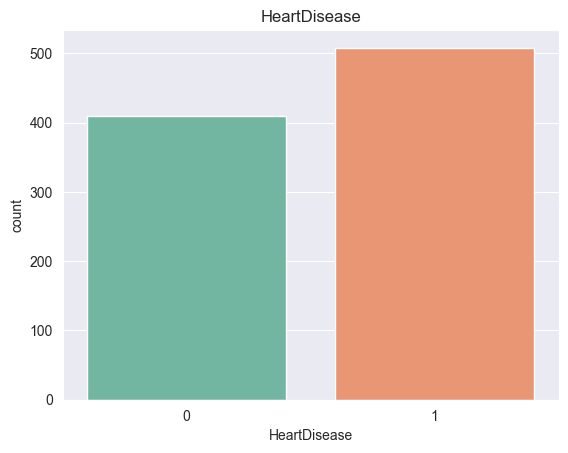

In [55]:
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title("HeartDisease")
plt.show()


In [56]:
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


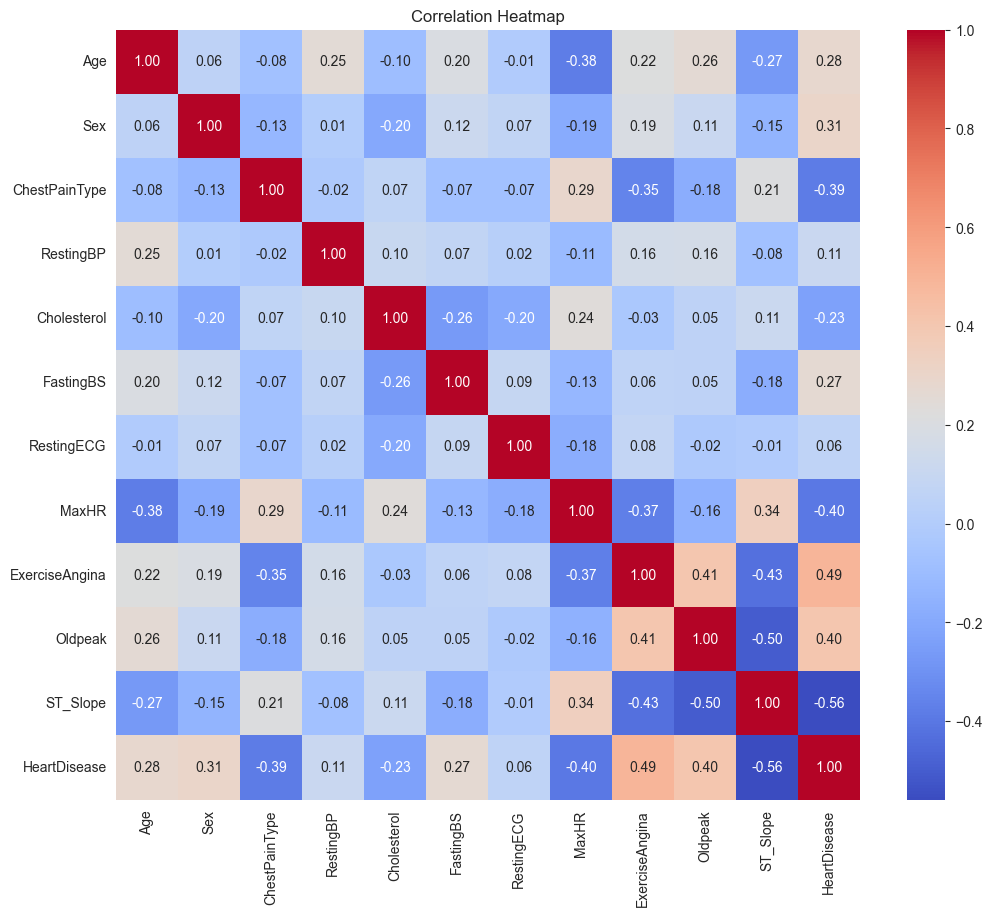

In [57]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



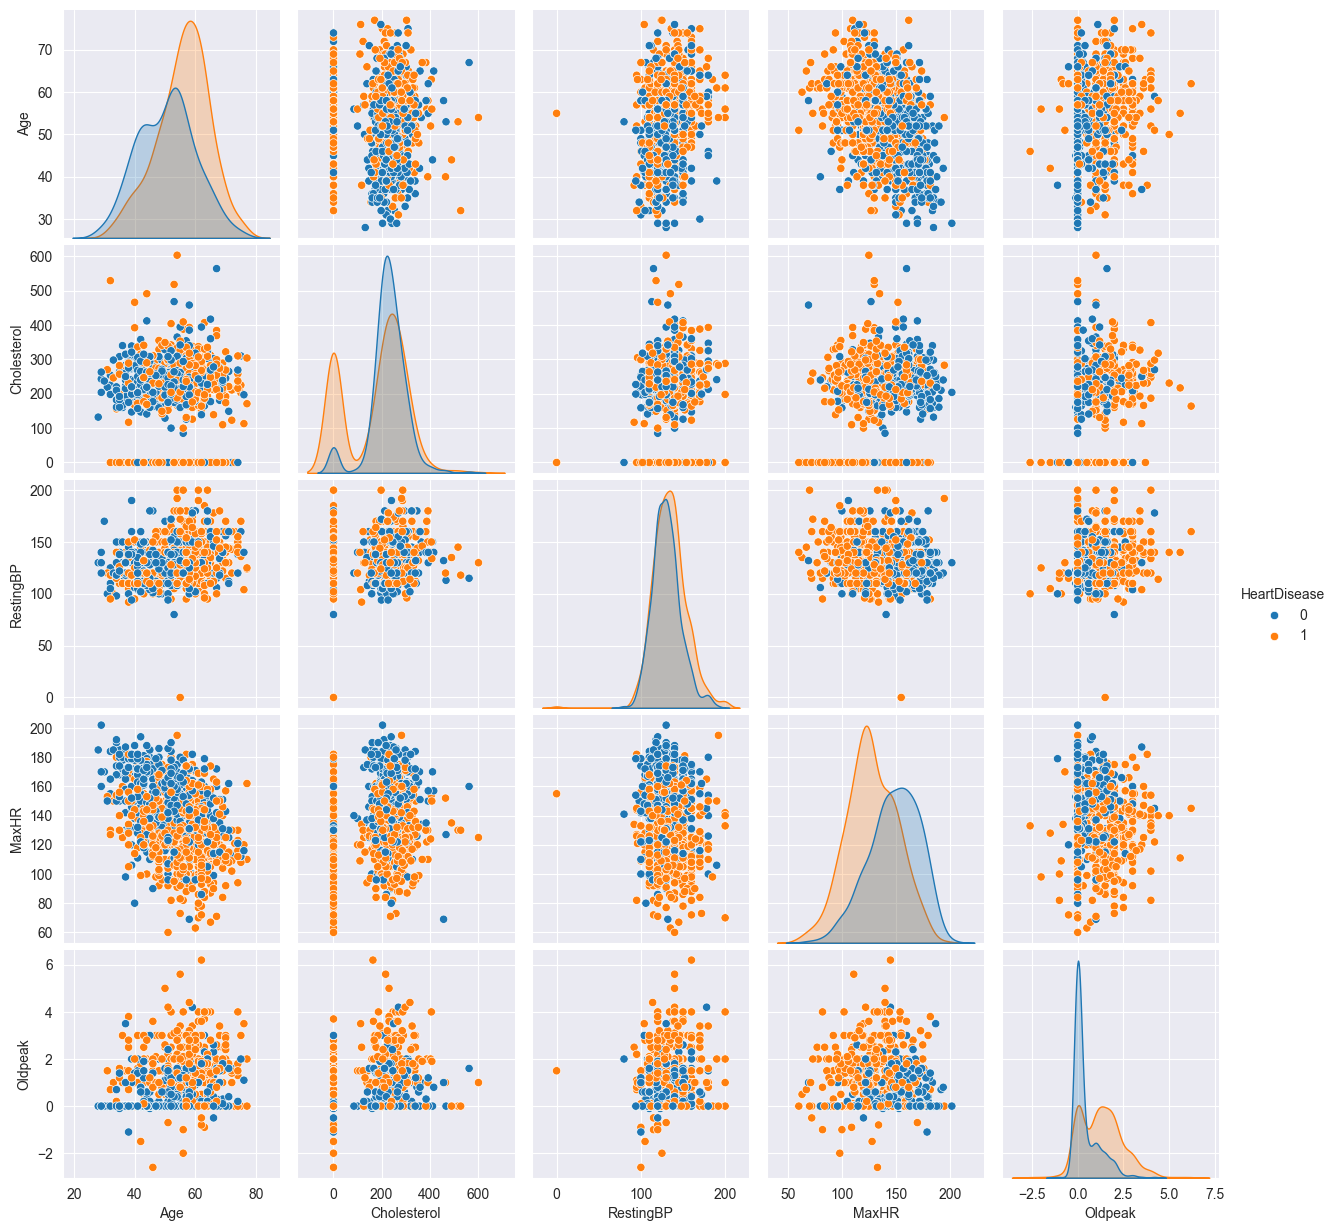

In [58]:
sns.pairplot(df[['Age', 'Cholesterol', 'RestingBP', 'MaxHR', 'Oldpeak', 'HeartDisease']], hue="HeartDisease")
plt.show()


C:\Users\YASH\AppData\Local\Temp\ipykernel_19724\4203306571.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Age', data=df, palette='Set3')


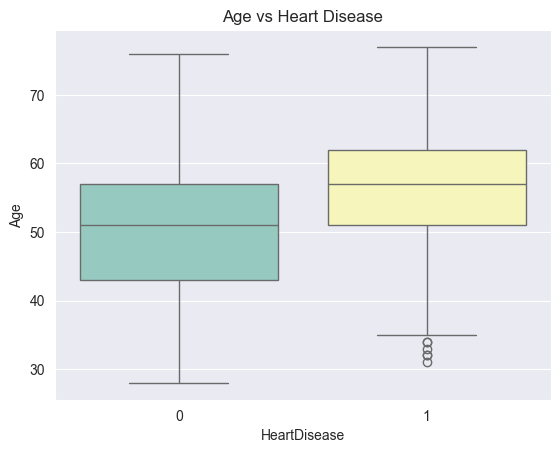

In [59]:
sns.boxplot(x='HeartDisease', y='Age', data=df, palette='Set3')
plt.title("Age vs Heart Disease")
plt.show()


In [60]:
X = df.drop(['HeartDisease', '#', ''], axis=1, errors='ignore')
y = df['HeartDisease']


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((734, 11), (184, 11), (734,), (184,))

In [63]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1


In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [65]:
results = []



LogisticRegression

In [83]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression (base):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Logistic Regression (base):
Accuracy: 0.8478260869565217
Precision: 0.9072164948453608
Recall: 0.822429906542056
F1 Score: 0.8627450980392157


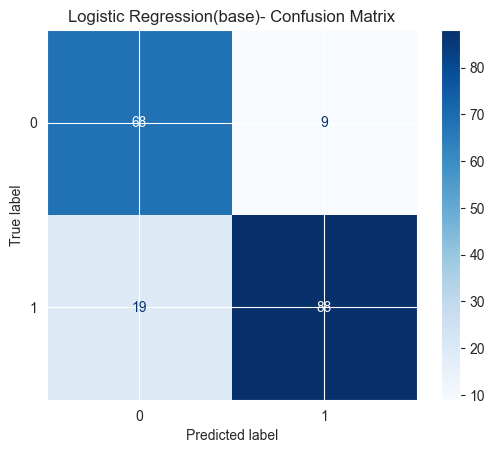

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Logistic Regression(base)- Confusion Matrix")
plt.show()

In [66]:
model = LogisticRegression()
params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}
grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


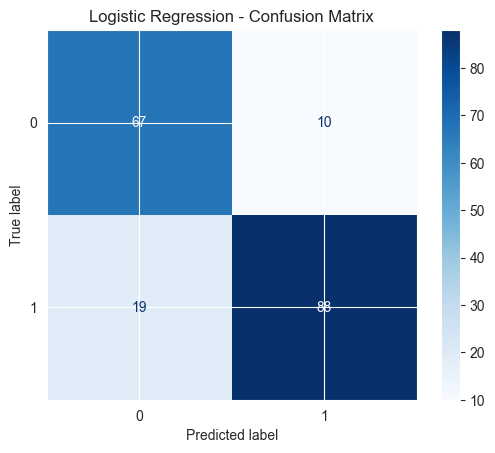

In [67]:
result={
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

if result not in results:
    results.append(result)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


RandomForest

In [85]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Random Forest (base):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Random Forest (base):
Accuracy: 0.8804347826086957
Precision: 0.912621359223301
Recall: 0.8785046728971962
F1 Score: 0.8952380952380953


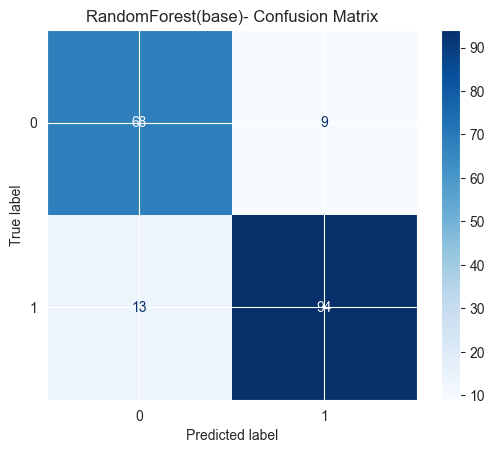

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("RandomForest(base)- Confusion Matrix")
plt.show()

In [68]:
model = RandomForestClassifier()
params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}
random_search = RandomizedSearchCV(model, params, n_iter=5, cv=3, scoring='f1', n_jobs=6, random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)


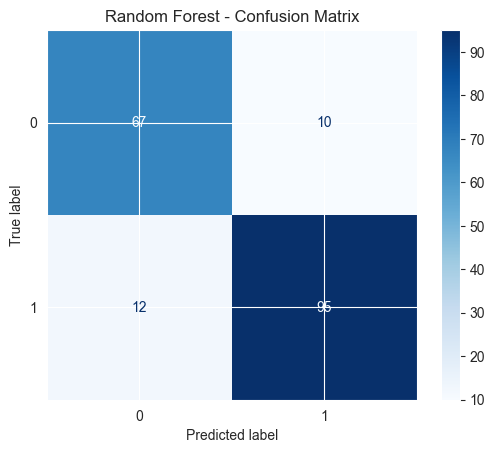

In [69]:

result={
    'Model': 'Random Forest ',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

if result not in results:
    results.append(result)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()




SVM

In [88]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("SVM (base):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


SVM (base):
Accuracy: 0.8641304347826086
Precision: 0.8942307692307693
Recall: 0.8691588785046729
F1 Score: 0.8815165876777251


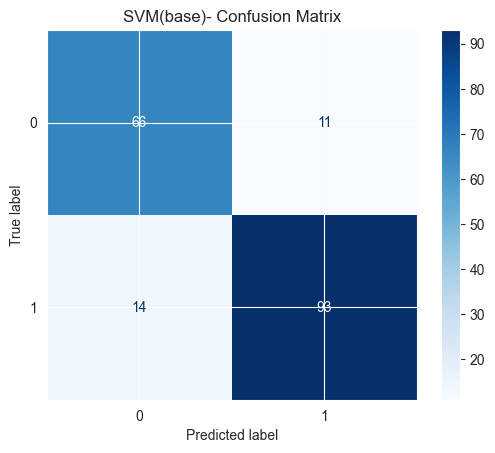

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("SVM(base)- Confusion Matrix")
plt.show()

In [70]:
model = SVC()
params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=6)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


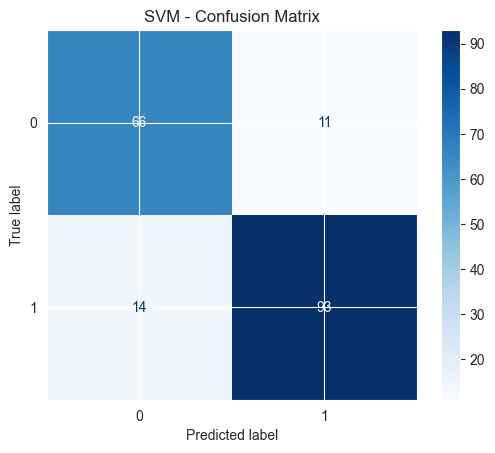

In [71]:
result={
    'Model': 'SVM',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

if result not in results:
    results.append(result)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("SVM - Confusion Matrix")
plt.show()


KNN

In [92]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("KNN (base):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


KNN (base):
Accuracy: 0.8478260869565217
Precision: 0.9072164948453608
Recall: 0.822429906542056
F1 Score: 0.8627450980392157


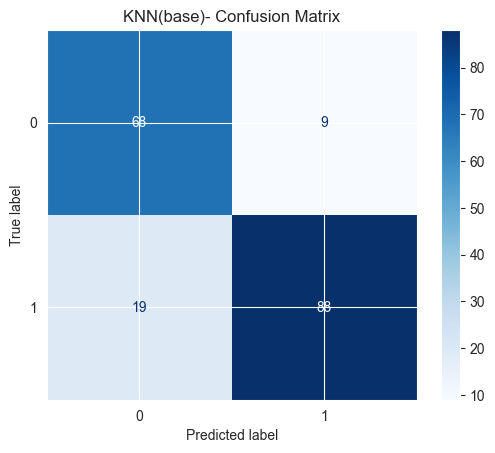

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("KNN(base)- Confusion Matrix")
plt.show()

In [72]:
model = KNeighborsClassifier()
params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=6)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


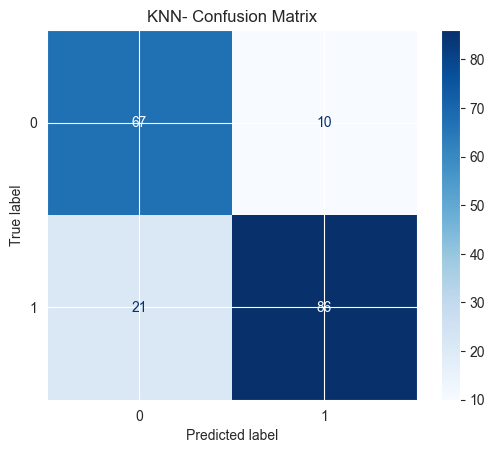

In [73]:
result={
    'Model': 'KNN',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred)
}

if result not in results:
    results.append(result)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("KNN- Confusion Matrix")
plt.show()


In [74]:
result_df = pd.DataFrame(results)
result_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.842391,0.897959,0.822430,0.858537
1,Random Forest,0.880435,0.904762,0.887850,0.896226
2,SVM,0.864130,0.894231,0.869159,0.881517
3,KNN,0.831522,0.895833,0.803738,0.847291


In [75]:
result_df_sorted = result_df.sort_values(by='F1 Score', ascending=False)
print(result_df_sorted)


                 Model  Accuracy  Precision    Recall  F1 Score
1       Random Forest   0.880435   0.904762  0.887850  0.896226
2                  SVM  0.864130   0.894231  0.869159  0.881517
0  Logistic Regression  0.842391   0.897959  0.822430  0.858537
3                  KNN  0.831522   0.895833  0.803738  0.847291


C:\Users\YASH\AppData\Local\Temp\ipykernel_19724\773355372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_df_sorted, x='F1 Score', y='Model', palette='viridis')


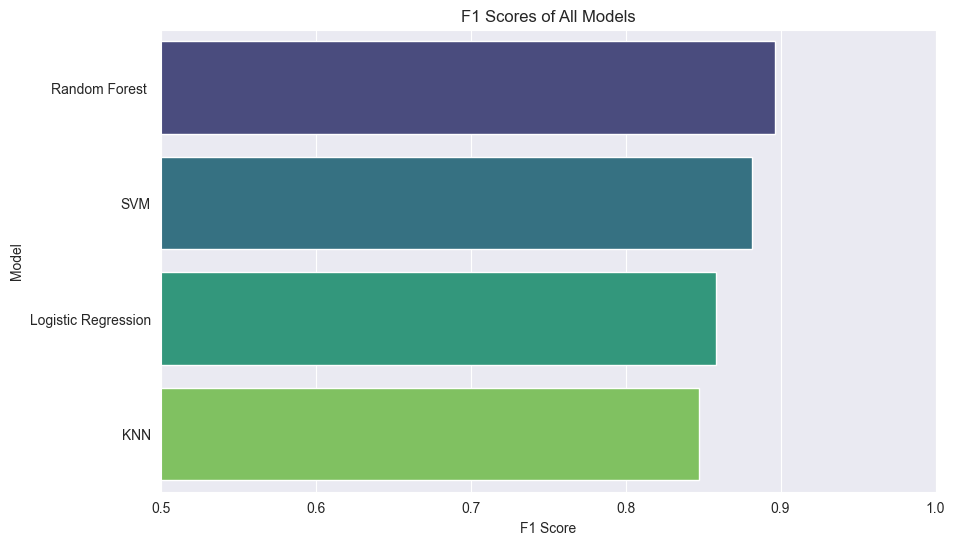

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(data=result_df_sorted, x='F1 Score', y='Model', palette='viridis')
plt.title("F1 Scores of All Models")
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.xlim(0.5, 1)
plt.show()


C:\Users\YASH\AppData\Local\Temp\ipykernel_19724\748222579.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_df.sort_values(by='Precision', ascending=False), x='Precision', y='Model', palette='viridis')


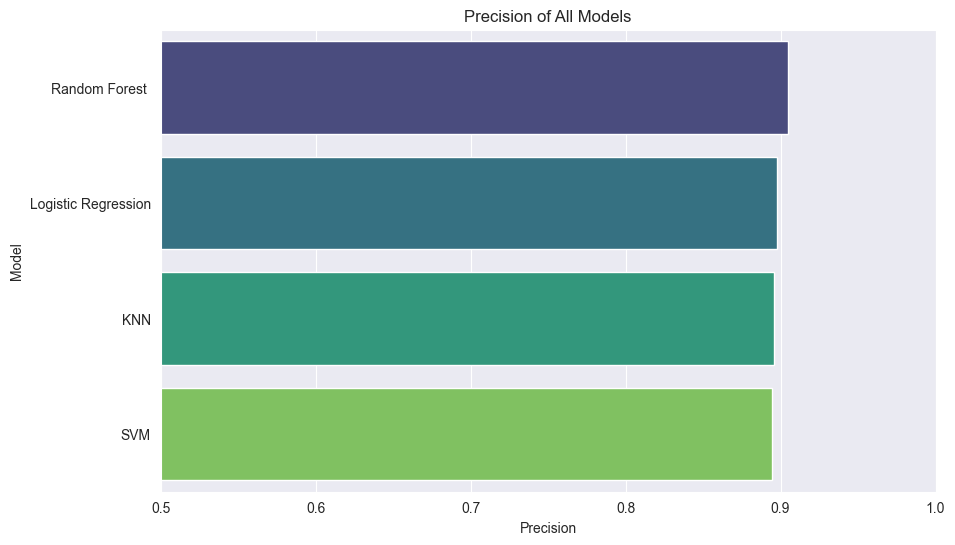

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(data=result_df.sort_values(by='Precision', ascending=False), x='Precision', y='Model', palette='viridis')
plt.title("Precision of All Models")
plt.xlabel("Precision")
plt.ylabel("Model")
plt.xlim(0.5, 1)
plt.show()


C:\Users\YASH\AppData\Local\Temp\ipykernel_19724\4173634205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=result_df.sort_values(by='Recall', ascending=False), x='Recall', y='Model', palette='viridis')


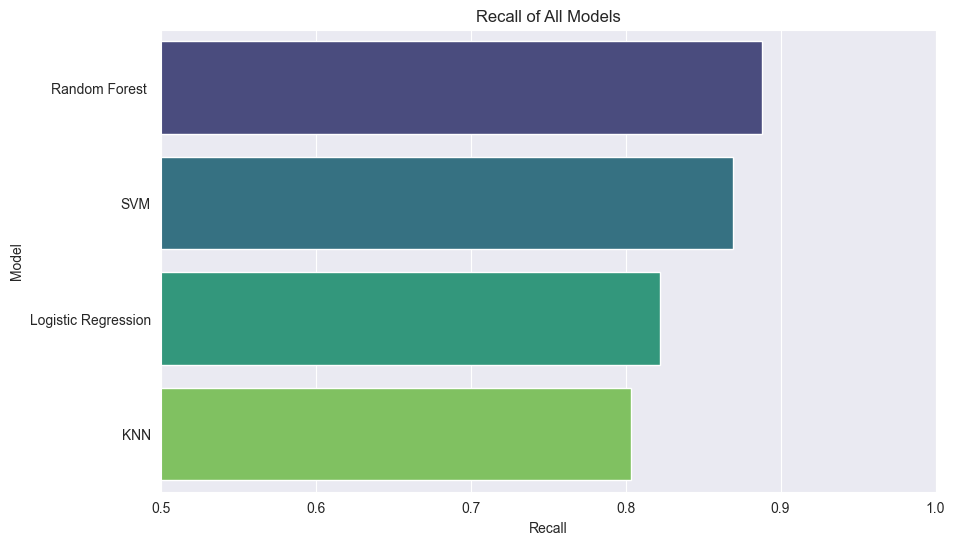

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(data=result_df.sort_values(by='Recall', ascending=False), x='Recall', y='Model', palette='viridis')
plt.title("Recall of All Models")
plt.xlabel("Recall")
plt.ylabel("Model")
plt.xlim(0.5, 1)
plt.show()


In [79]:
print('Best Model ;', result_df_sorted.iloc[0]['Model'])

Best Model ; Random Forest 
